## 教程

本指南可以帮助您开始使用NetworkX。

### 创建图形

创建一个没有节点和边的空图形。

In [1]:
import networkx as nx
G = nx.Graph()

根据定义，a `Graph` 是一组节点（顶点）和已识别的节点对（称为边、链接等）的集合。在NetworkX中，节点可以是任何 [hashable](https://docs.python.org/3/glossary.html#term-hashable) 对象，例如文本字符串、图像、XML对象、另一个图形、自定义节点对象等。

# 结点

图表 `G` 可以通过几种方式生长。NetworkX包括许多 graph generator functions 和 facilities to read and write graphs in many formats 。不过，在开始之前，我们将看一下简单的操作。您可以一次添加一个节点，

In [2]:
G.add_node(1)

或从任何 [iterable](https://docs.python.org/3/glossary.html#term-iterable) 容器，如列表

In [3]:
G.add_nodes_from([2, 3])

如果容器产生2个元组形式，还可以添加节点和节点属性 `(node, node_attribute_dict)` ：：

```
>>> G.add_nodes_from([
...     (4, {"color": "red"}),
...     (5, {"color": "green"}),
... ])
```

进一步讨论节点属性 below .

一个图中的节点可以合并到另一个图中：

In [4]:
H = nx.path_graph(10)
G.add_nodes_from(H)

`G` 现在包含的节点 `H` 作为节点 `G` . 相反，您可以使用图表 `H` 作为一个节点 `G` .

In [5]:
G.add_node(H)

图 `G` 现在包含 `H` 作为节点。这种灵活性非常强大，因为它允许图形、文件图形、函数图形等等。值得考虑如何构造应用程序，使节点成为有用的实体。当然，在 `G` 如果您愿意的话，还可以使用一个由标识符为节点信息键入的独立字典。

# 边缘

`G` 也可以通过一次添加一个边来生长，

In [6]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

通过添加边列表，

In [7]:
G.add_edges_from([(1, 2), (1, 3)])

或者通过添加 ebunch 边缘的安 *埃班斯* 是边缘元组的任何可重写容器。边元组可以是节点的2个元组，也可以是具有2个节点、后跟边属性字典的3个元组，例如， `(2, 3, {{'weight': 3.1415}})` .  进一步讨论了边缘属性 below .

In [8]:
G.add_edges_from(H.edges)

添加现有节点或边时没有投诉。例如，删除所有节点和边之后，

In [9]:
G.clear()

我们添加新的节点/边缘，NetworkX会悄悄地忽略已经存在的任何节点/边缘。

In [10]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

在这个阶段，图表 `G` 由8个节点和3个边组成，如下所示：

In [11]:
G.number_of_nodes()
G.number_of_edges()

3

In [12]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

# 检查图的元素

我们可以检查节点和边。四个基本图形属性有助于报告： `G.nodes` ， `G.edges` ， `G.adj` 和 `G.degree` 。这些是图形中节点、边、邻居(邻接)和度的集合式视图。它们为图表结构提供了不断更新的只读视图。它们还类似于字典，因为您可以通过视图查找结点和边数据属性，并使用方法迭代数据属性 `.items()` ， `.data()` 。如果您想要特定的容器类型而不是视图，您可以指定一个。这里我们使用列表，尽管集合、字典、元组和其他容器在其他上下文中可能更好。

In [13]:
list(G.nodes)
list(G.edges)
list(G.adj[1])  # or list(G.neighbors(1))
G.degree[1]  # the number of edges incident to 1

2

可以指定使用 nbunch . 安 *纳布斯* 是否属于： `None` （指所有节点）、一个节点或节点的iterable容器，它本身不是图中的节点。

In [14]:
G.edges([2, 'm'])
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

# 从图形中删除元素

可以用与添加类似的方式从图形中删除节点和边。使用方法 `Graph.remove_node()` ， `Graph.remove_nodes_from()` ， `Graph.remove_edge()` 和 `Graph.remove_edges_from()` ，例如

In [15]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)
G.remove_edge(1, 3)

# 使用图形构造函数

图形对象不必以增量方式构建——指定图形结构的数据可以直接传递给各种图形类的构造函数。当通过实例化一个图形类来创建一个图结构时，可以用几种格式指定数据。

In [16]:
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
list(H.edges())
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
list(H.edges())
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
list(H.edges())

[(0, 1), (0, 2), (1, 2)]

# 用作节点和边的内容

您可能会注意到节点和边没有指定为networkx对象。这使您可以自由地将有意义的项用作节点和边。最常见的选择是数字或字符串，但是节点可以是任何可哈希对象（除了 `None` ）并且边缘可以与任何对象关联 `x` 使用 `G.add_edge(n1, n2, object=x)` .

作为一个例子， `n1` 和 `n2` 可能是来自RCSB蛋白质数据库的蛋白质对象，以及 `x` 可以参考出版物的XML记录，该记录详细描述了它们交互的实验观察结果。

我们发现这种能力非常有用，但是如果不熟悉Python，它的滥用会导致令人惊讶的行为。如果有疑问，考虑使用 `convert_node_labels_to_integers()` 以获得更传统的带有整数标签的图形。

# 访问边缘和邻居

除了视图 `Graph.edges` 和 `Graph.adj` ，可以使用下标表示法访问边和邻居。

In [17]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]
G[1][2]
G.edges[1, 2]

{'color': 'yellow'}

如果边已经存在，可以使用下标表示法获取/设置边的属性。

In [18]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

使用 `G.adjacency()` 或 `G.adj.items()` . 注意，对于无向图，邻接迭代可以看到每个边两次。

In [19]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


使用边缘属性可以方便地访问所有边缘。

In [20]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


# 向图形、节点和边添加属性

诸如权重、标签、颜色或任何您喜欢的python对象等属性都可以附加到图形、节点或边上。

每个图、节点和边都可以在关联的属性字典中保存键/值属性对（键必须是可哈希的）。默认情况下，这些属性为空，但可以使用 `add_edge` ， `add_node` 或直接操作命名的属性字典 `G.graph` ， `G.nodes` 和 `G.edges` 对于图 `G` .

## 图形属性

创建新图形时分配图形属性

In [21]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

或者您可以稍后修改属性

In [22]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

# 节点属性

使用添加节点属性 `add_node()` ， `add_nodes_from()` 或 `G.nodes`

In [23]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

请注意，将节点添加到 `G.nodes` 不将其添加到图表中，使用 `G.add_node()` 添加新节点。同样适用于边缘。

# 边缘属性

使用添加/更改边缘属性 `add_edge()` ， `add_edges_from()` 或下标符号。

In [24]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

特殊属性 `weight` 应该是数字，因为它被需要加权边缘的算法使用。

 有向图

这个 `DiGraph` 类提供特定于有向边的附加方法和属性，例如， `DiGraph.out_edges` ， `DiGraph.in_degree` ， `DiGraph.predecessors` ， `DiGraph.successors` 等。为了允许算法轻松地处理这两个类， `neighbors` 相当于 `successors` 而当 `degree` 报告的总和 `in_degree` 和 `out_degree` 尽管这有时可能会让人感觉不一致。

In [25]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')
DG.degree(1, weight='weight')
list(DG.successors(1))
list(DG.neighbors(1))

[2]

有些算法只适用于有向图，而另一些算法不适用于有向图。实际上，将有向图和无向图集中在一起的趋势是危险的。如果要将有向图视为某些度量的无向图，则应该使用 `Graph.to_undirected()` 或与

In [26]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

# 多重图

NetworkX为允许任意节点对之间存在多个边的图形提供类。这个 `MultiGraph` 和 `MultiDiGraph` 类允许您两次添加相同的边缘，可能使用不同的边缘数据。这对某些应用程序来说可能很强大，但许多算法在此类图上没有很好的定义。如果结果定义明确，例如： `MultiGraph.degree()` 我们提供功能。否则，您应该以一种使测量定义良好的方式转换为标准图。

In [27]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

# 图形生成器和图形操作

除了逐节点或逐边构造图外，还可以通过

## 1.应用经典的图形操作，例如：

## 2.使用对经典小图形之一的调用，例如，

## 3.使用经典图形的(构造性)生成器，例如，

像这样：

In [28]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

# 4.使用随机图形生成器，例如，

像这样：

In [29]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

# 5.使用常用图形格式读取存储在文件中的图形

NetworkX支持许多流行的格式，如边缘列表、邻接列表、GML、GraphML、PICLE、LEDA等。

In [30]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

有关图形格式的详细信息，请参见 读写图表 关于图形生成器函数，请参见 图形生成器

 分析图形

的结构 `G` 可以使用各种图论函数进行分析，例如：

In [31]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))
sorted(d for n, d in G.degree())
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

一些具有大输出的函数迭代（节点、值）2元组。这些很容易存储在 [dict](https://docs.python.org/3/library/stdtypes.html#dict) 结构，如果你愿意的话。

In [32]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

见 算法 有关支持的图形算法的详细信息。

# 图形绘制

NetworkX主要不是一个图形绘制包，但包括了Matplotlib的基本绘制以及使用开源Graphviz软件包的接口。这些都是 networkx.drawing 模块，并将在可能的情况下导入。

首先导入Matplotlib的绘图接口（Pylab也可以工作）

In [33]:
import matplotlib.pyplot as plt

要测试是否导入 `nx_pylab` 是成功的平局 `G` 使用以下选项之一

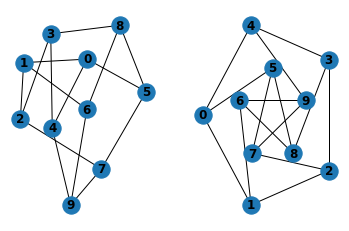

In [34]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

当绘制到交互显示时。请注意，您可能需要发布matplotlib

In [35]:
plt.show()

如果您没有在交互模式下使用matplotlib，请使用命令。

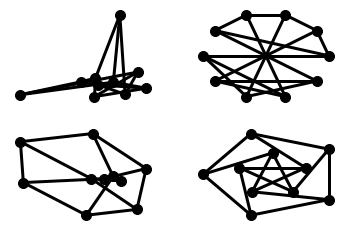

In [36]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

您可以通过以下方式找到其他选项 `draw_networkx()` 和布局通过 `layout module` 。您可以将多个外壳与 `draw_shell()` 。

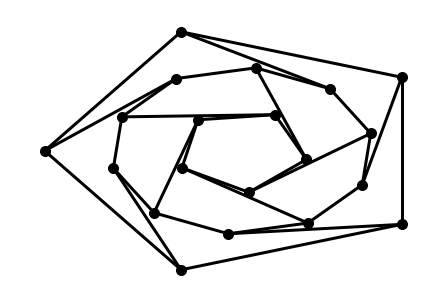

In [37]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

例如，要将图形保存到文件中，请使用

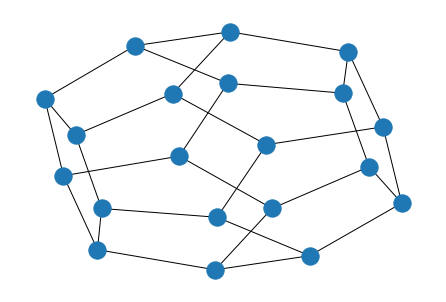

In [38]:
nx.draw(G)
plt.savefig("path.png")

此函数用于写入文件 `path.png` 在本地目录中。如果您的系统上有Graphviz和PyGraphviz或PYDot，您还可以使用 `networkx.drawing.nx_agraph.graphviz_layout` 或 `networkx.drawing.nx_pydot.graphviz_layout` 以获取节点位置，或以点格式写出图形以供进一步处理。

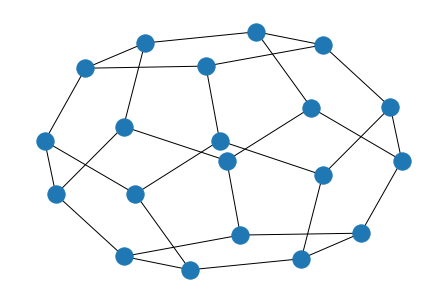

In [39]:
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'file.dot')

见 绘图 更多细节。